# Data Preprocessing

## Library imports

In [1]:
import numpy as np 
import pandas as pd 
import os
from sklearn.linear_model import LogisticRegression #this is import from scikit-learn they used for binary and classification
from sklearn.model_selection import GridSearchCV#this will use tunning
from sklearn.datasets import load_iris#this use for load the dataset
from sklearn.model_selection import train_test_split #this split the that dataset to train and test subsets
from sklearn.preprocessing import StandardScaler, LabelEncoder #this will use scaling the dataset
from sklearn.neighbors import KNeighborsClassifier#algorithem finds k closest training
from sklearn.metrics import accuracy_score# find the accuray score


In [2]:
import matplotlib.pyplot as plt#use visualization
import seaborn as sns#get the dataset

## Data Imports

In [4]:
df=sns. load_dataset("iris")
#dataset import for sns library and load that dataset assain df object

## EDA Exploratory Data Analysis

In [6]:
df.head()
#this will show first top 5 row in dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df.info()
#this will show for informaation of dataset like total column total row(index) datetypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df.describe()
#this is show the classification in count value ,mean, standarddeviation ,minimum and maximum ,75%,25%,50%

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Handling Missing Values

In [15]:
df.isnull().sum()
#check the any null values in dataset

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Feature Engineering

In [19]:
scaler = StandardScaler()#this standardscalar function tranform the data points 0 to 1
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns #this select the numerical columns only based on datatype
df[numerical_cols] = scaler.fit_transform(df[numerical_cols]) #fit transform called on scalar functin theey will transform the data points this work find stdard deviation value then scaled
print(df)#print that

     sepal_length  sepal_width  petal_length  petal_width    species
0       -0.900681     1.019004     -1.340227    -1.315444     setosa
1       -1.143017    -0.131979     -1.340227    -1.315444     setosa
2       -1.385353     0.328414     -1.397064    -1.315444     setosa
3       -1.506521     0.098217     -1.283389    -1.315444     setosa
4       -1.021849     1.249201     -1.340227    -1.315444     setosa
..            ...          ...           ...          ...        ...
145      1.038005    -0.131979      0.819596     1.448832  virginica
146      0.553333    -1.282963      0.705921     0.922303  virginica
147      0.795669    -0.131979      0.819596     1.053935  virginica
148      0.432165     0.788808      0.933271     1.448832  virginica
149      0.068662    -0.131979      0.762758     0.790671  virginica

[150 rows x 5 columns]


## Handling Outliers

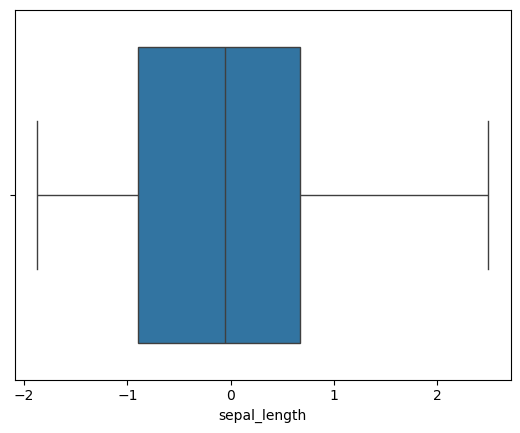

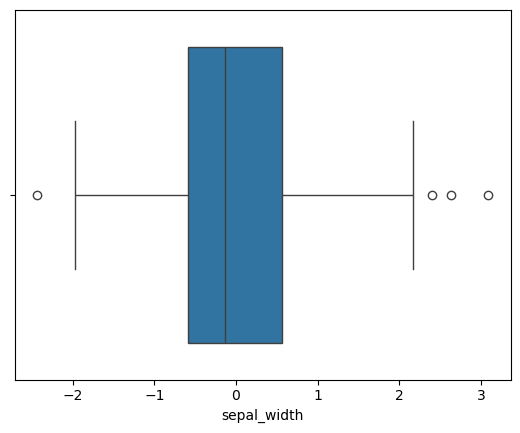

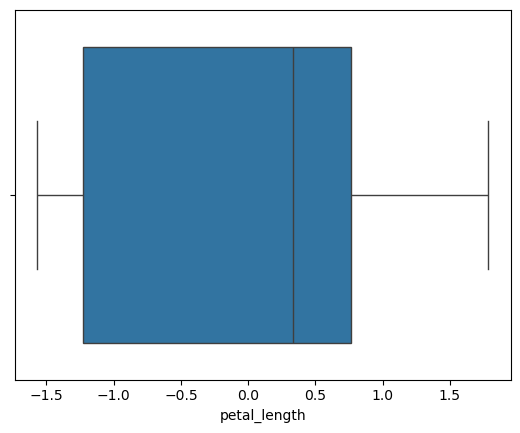

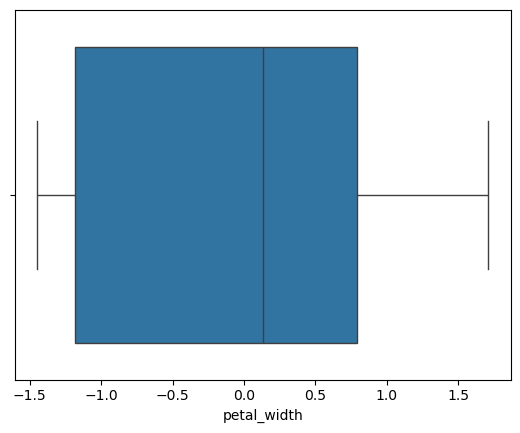

In [121]:

for column in df.columns[:-1]: #last column will drop that function
    sns.boxplot(x=df[column])
    plt.show()
#handling outliers in this cell 

for column in df.columns[:-1]:
    Q1 = df[column].quantile(0.25) #find q1 value
    Q3 = df[column].quantile(0.75) #find q3 value
    IQR = Q3 - Q1 #find iqr value
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound) #find upper bound , lower bound they any value above in upper they replace upper bound value ,value below the lower bound value they replace lower bound value

## Data Visualization

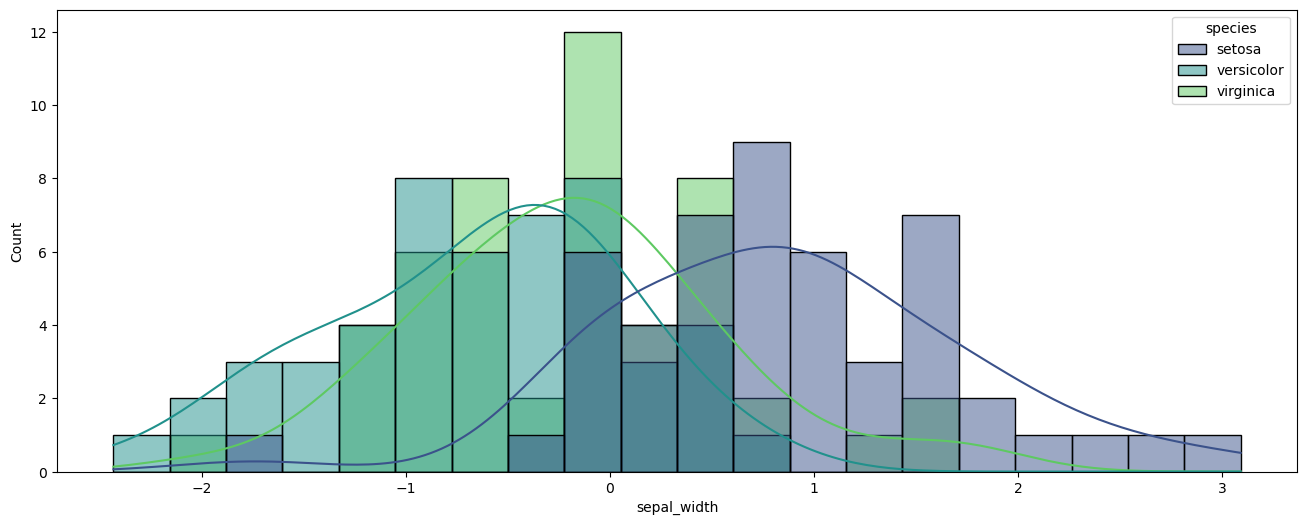

In [21]:
plt.figure(figsize=(16,6))
sns.histplot(df, x='sepal_width', hue='species', palette='viridis', kde=True, bins=20)
plt.show()
#you see y axis is count of species that value poits 
#the curve represent distribution of data points

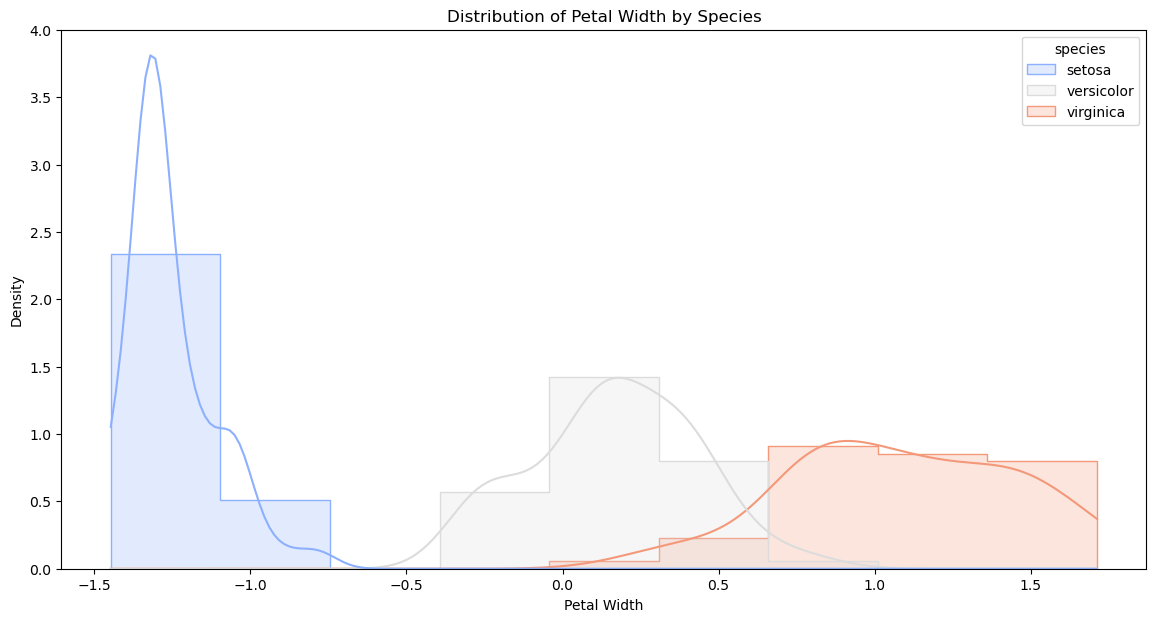

In [23]:

plt.figure(figsize=(14, 7))
sns.histplot(df, x='petal_width', hue='species' ,palette='coolwarm',element="step" ,kde=True, stat="density", common_norm=False)

plt.title('Distribution of Petal Width by Species')
plt.xlabel('Petal Width')
plt.ylabel('Density')
plt.show()
#this present density of species 

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

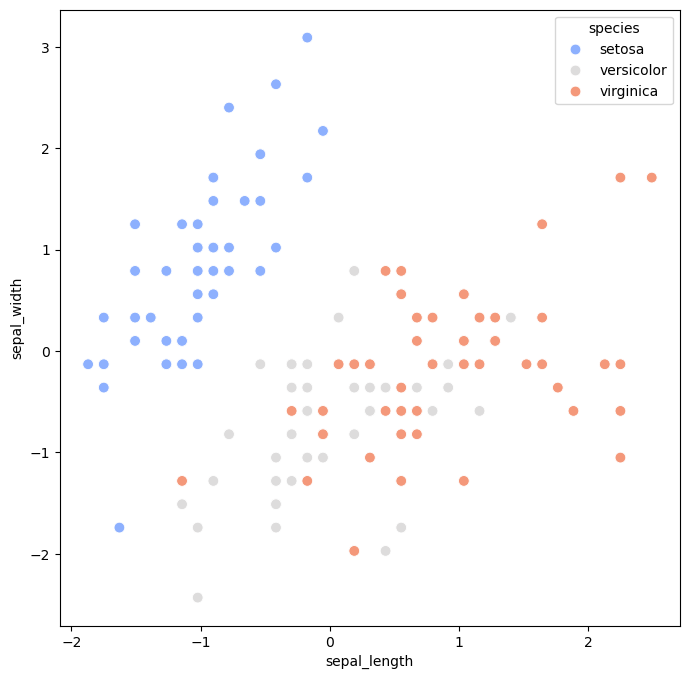

In [25]:
plt.figure(figsize =(8,8))
sns.scatterplot(x='sepal_length', y='sepal_width',data=df,hue ='species',palette = 'coolwarm' ,s=60)
#this availablety of datapoints

<Axes: xlabel='petal_length', ylabel='petal_width'>

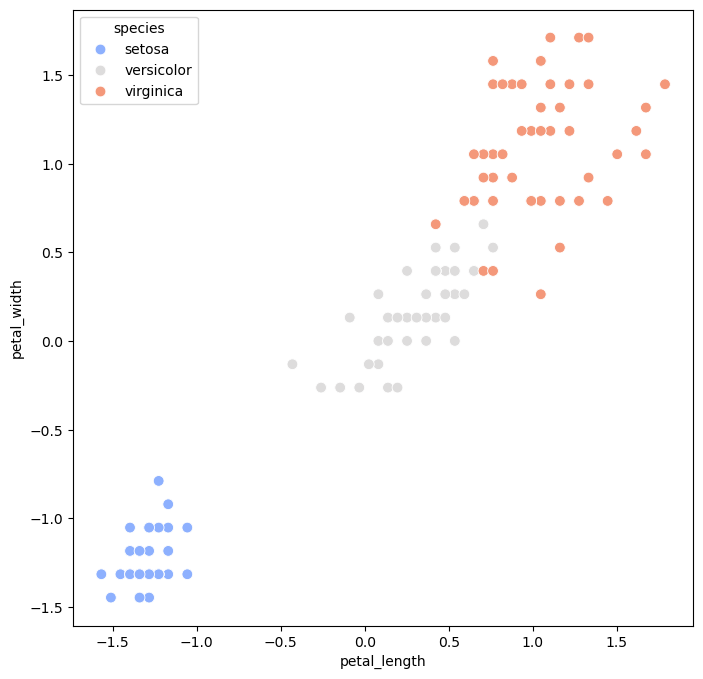

In [27]:
plt.figure(figsize =(8,8))
sns.scatterplot(x='petal_length', y='petal_width',data=df,hue ='species',palette = 'coolwarm' ,s=60)
#this also available of datapoints

<Figure size 800x800 with 0 Axes>

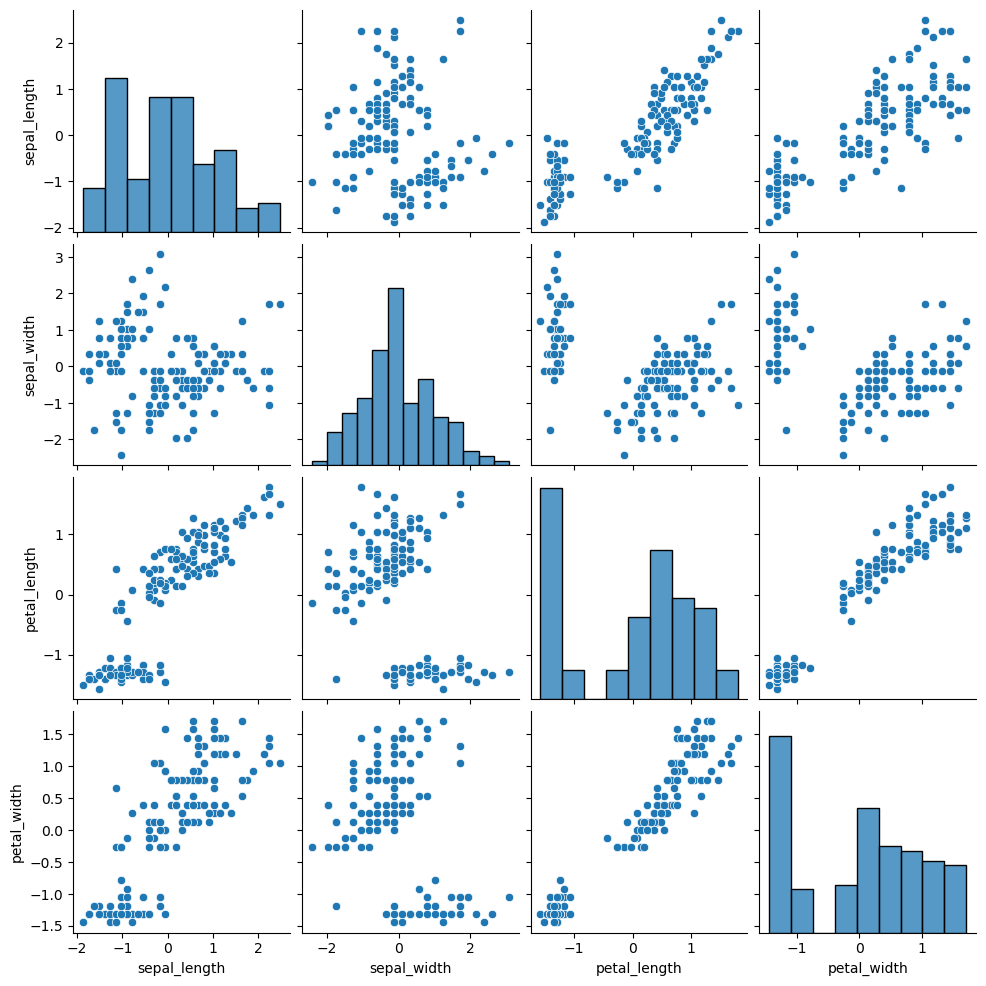

In [29]:
plt.figure(figsize = (8,8))
sns.pairplot(df)
#variase of datapoint visual

#  KNN (K--Nearest Neighbors )

## Model Bulding

In [31]:
x = df.drop(['species'],axis = 1)
y = df['species']
#drop species column assain on y object 

In [35]:
print("Features DataFrame (x):")
print(x)
#balance clumns of x

Features DataFrame (x):
     sepal_length  sepal_width  petal_length  petal_width
0       -0.900681     1.019004     -1.340227    -1.315444
1       -1.143017    -0.131979     -1.340227    -1.315444
2       -1.385353     0.328414     -1.397064    -1.315444
3       -1.506521     0.098217     -1.283389    -1.315444
4       -1.021849     1.249201     -1.340227    -1.315444
..            ...          ...           ...          ...
145      1.038005    -0.131979      0.819596     1.448832
146      0.553333    -1.282963      0.705921     0.922303
147      0.795669    -0.131979      0.819596     1.053935
148      0.432165     0.788808      0.933271     1.448832
149      0.068662    -0.131979      0.762758     0.790671

[150 rows x 4 columns]


In [37]:
print("\nTarget Series (y):")
print(y)
# y colum can target


Target Series (y):
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


## Train Test Split

In [39]:

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3 ,random_state = 0)
#split the datapoint four operation

## Model Initialization

In [41]:
ln = KNeighborsClassifier(n_neighbors=5) 
#initializtion the model assain neighbour value

## Model Training

In [43]:
ln.fit(x_train , y_train )
ln.score(x_train,y_train)
#train the model use fit function

0.9714285714285714

##  Hyper Parameter Tunning

In [45]:
knn = KNeighborsClassifier()


param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)


print("Best parameters found: ", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
#tuning the model get best form of accuracy score

Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best Accuracy: 0.9523809523809523


# Evaluation and Result

In [47]:
predictions = ln.predict(x_test)
predictions
#preedict the test value use prdict function

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [49]:
y_test

114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
100     virginica
40         setosa
86     versicolor
76     versicolor
71     versicolor
134     virginica
51     versicolor
73     versicolor
54     versicolor
63     versicolor
37         setosa
78     versicolor
90     versicolor
45         setosa
16         setosa
121     virginica
66     versicolor
24         setosa
8          setosa
126     virginica
22         setosa
44         setosa
97     versicolor
93     versicolor
26         setosa
137     virginica
84     versicolor
27         setosa
127     virginica
132     virginica
59     versicolor
18         setosa
83     versicolor
61     versicolor
92     versicolor
112     virginica
2          setosa
141     virginica
43         setosa
10         setosa
Name: species, dtype: object

In [51]:
accuracy_score(y_test,predictions)
#show the acc

0.9777777777777777

### Errors

### Research